In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\danie\AppData\Local\Temp\ipykernel_25212\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file = 'datasets\car_data\CO2 Emissions_Canada.csv'

df = pd.read_csv(file, sep=',')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# Pairplot de la relacion entre variables

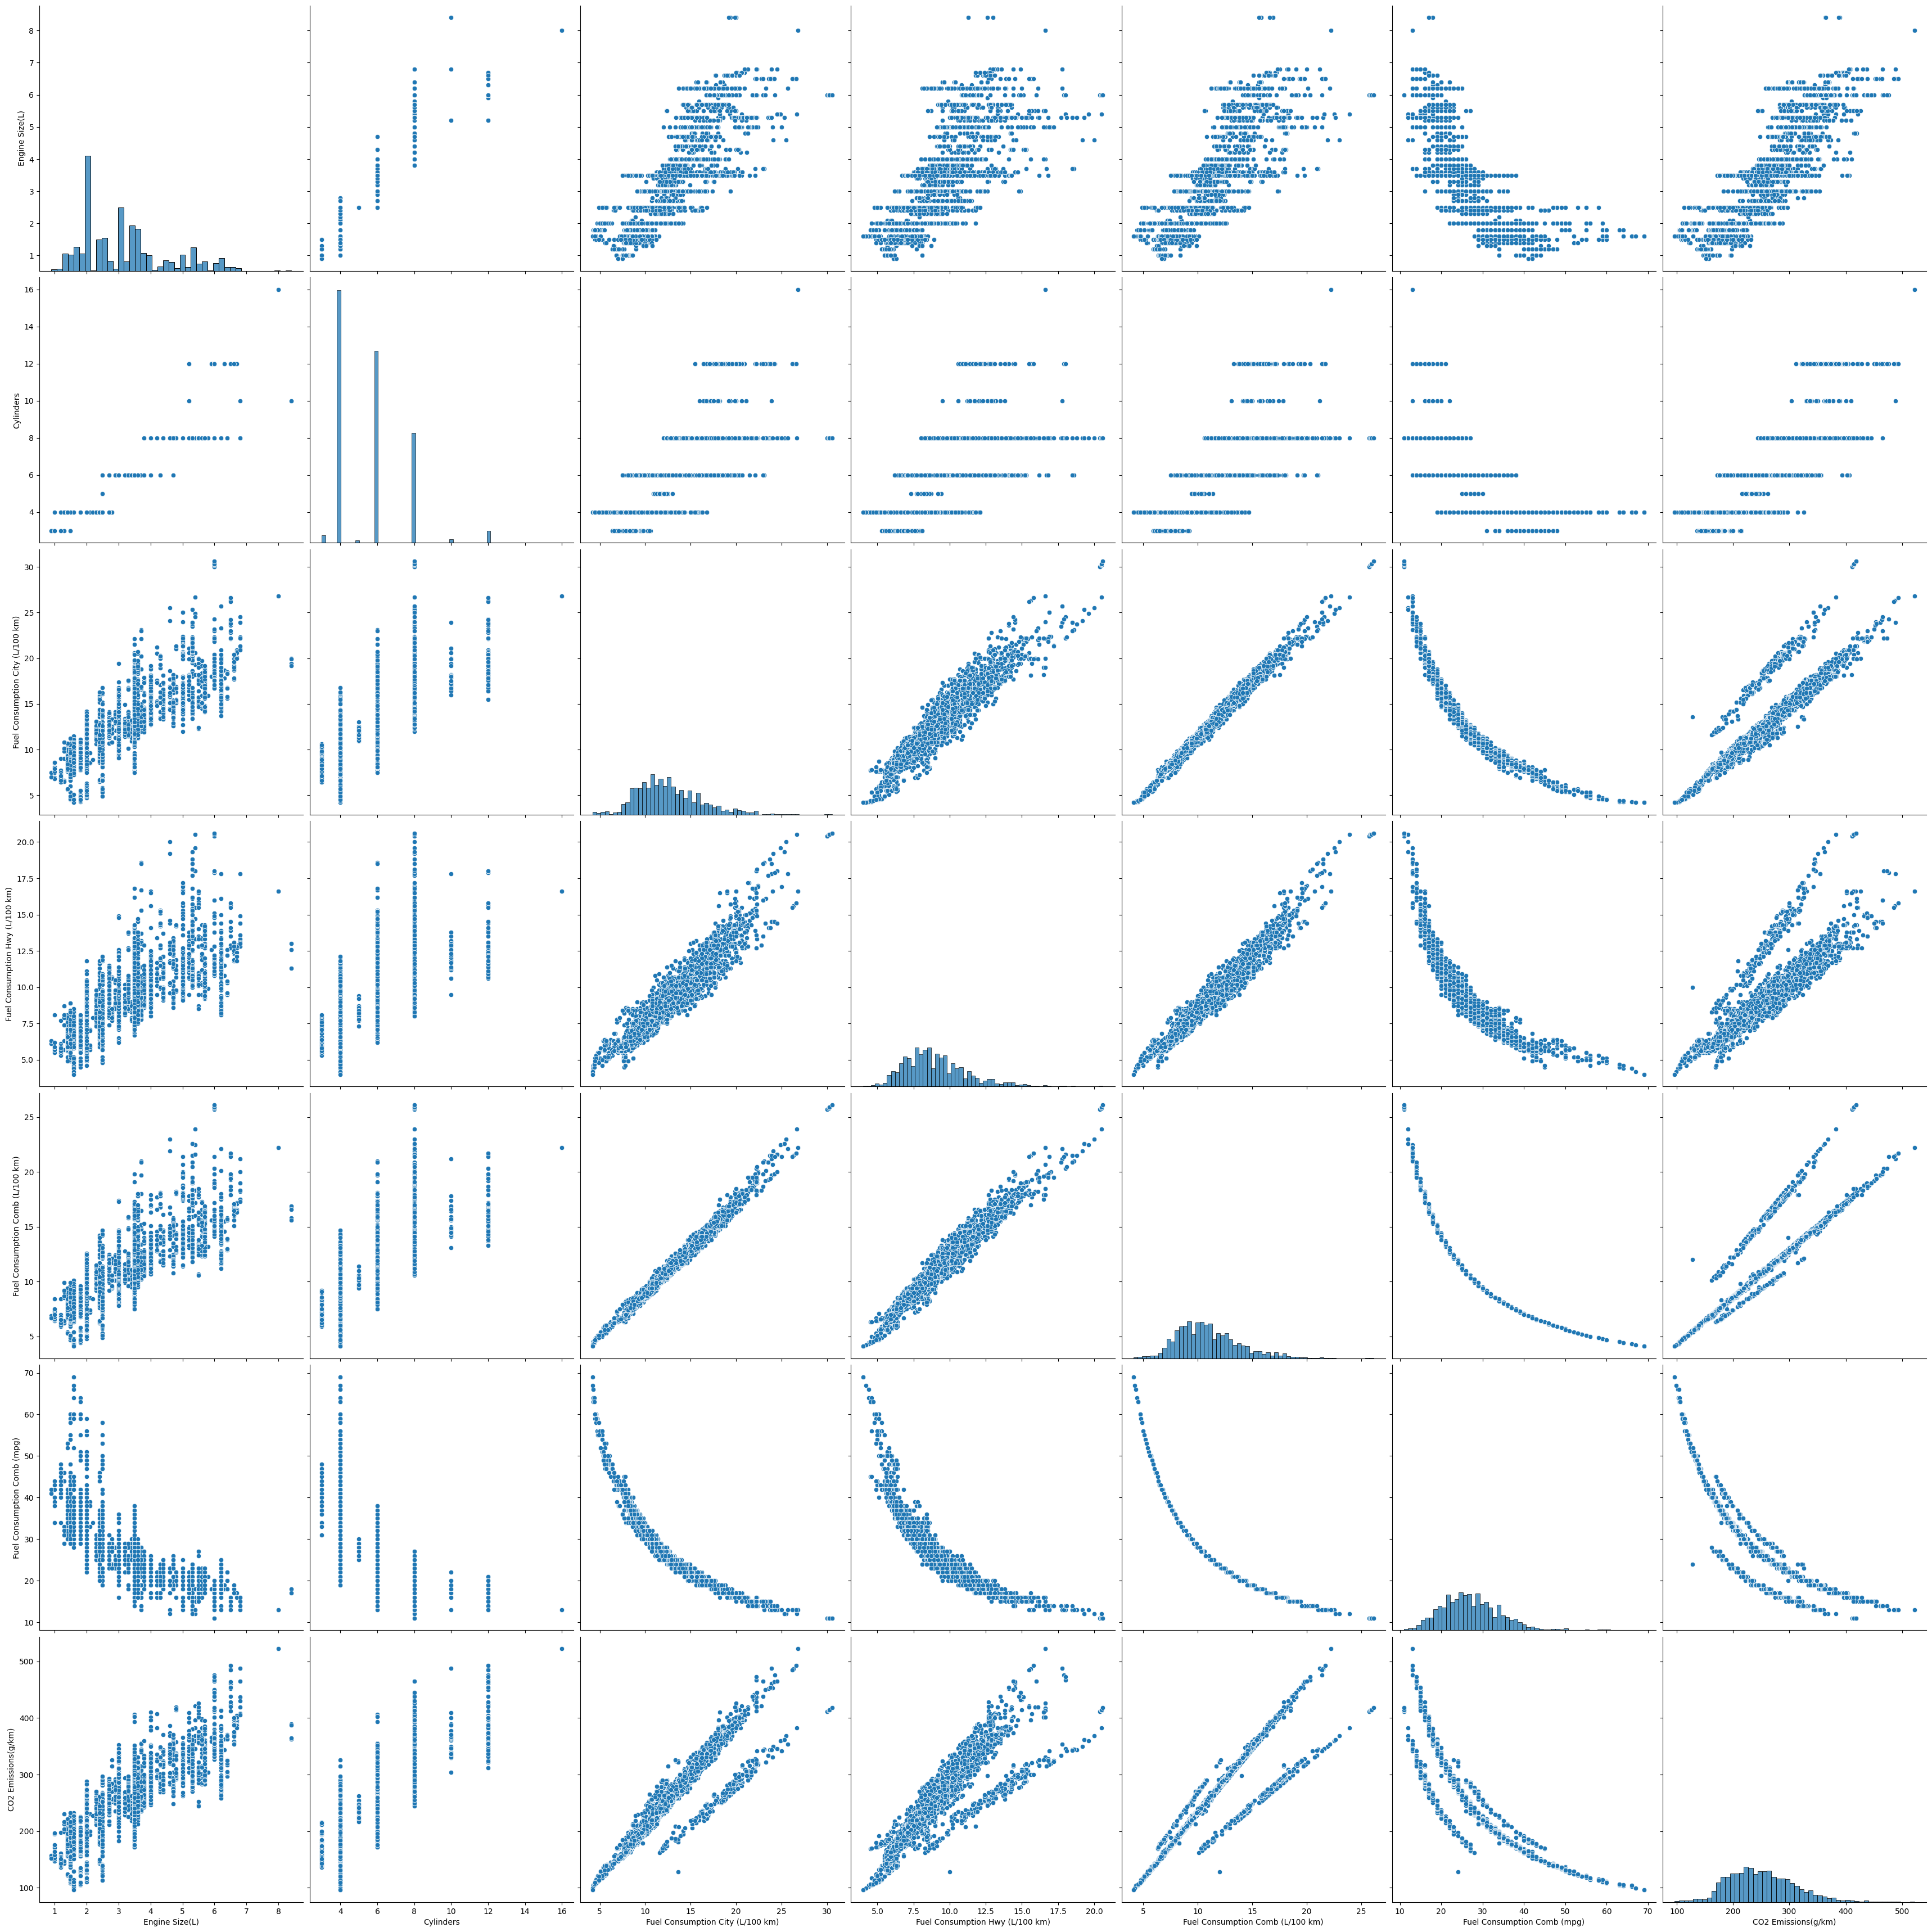

In [5]:
sns.pairplot(df, height=5)

# Funcion para boxplot

In [6]:
def box_plot_data(data):
    plt.figure(1, figsize=(15,12))
    n_col=3
    total_col = int(len(data.columns)/2)
    n_row = int(np.ceil(total_col)) 

    for i, col in enumerate(data.columns):
        plt.subplot(n_row,n_col, i+1)
        sns.boxplot(data=data, x=col)
        plt.title(col)
        plt.tight_layout()
    
    plt.show()

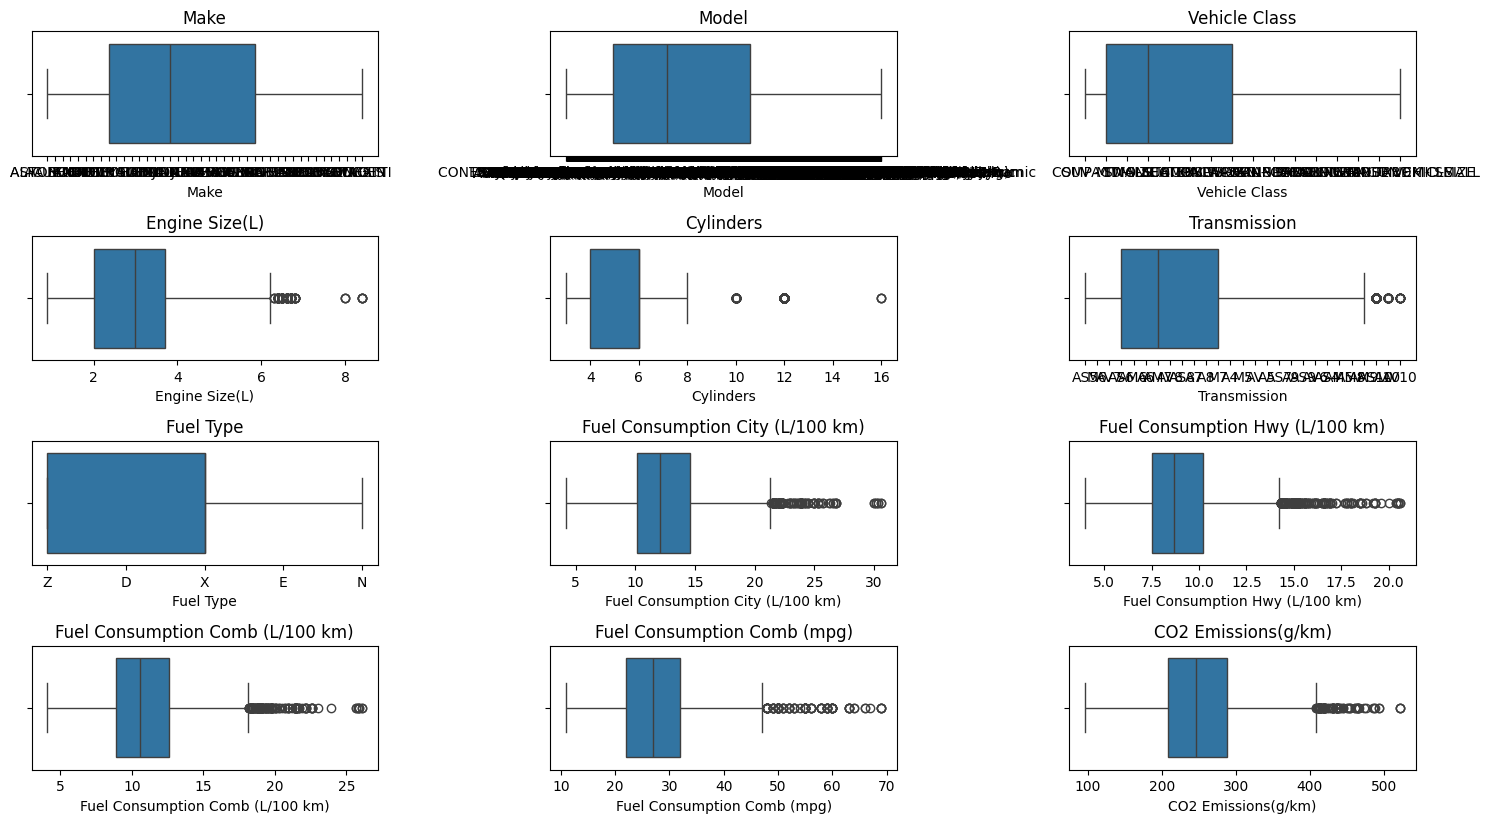

In [7]:
box_plot_data(df)

In [9]:
def evaluar_atipicos(data):
    for col, val in data.items():
        Q1 = val.quantile(0.25)
        Q3 = val.quantile(0.75)

        IQR = Q3 - Q1

        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)

        v_col = val[(val <= lower_limit) | (val >= upper_limit)]
        porcentaje = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print(f'Valores atipicos para la columna "%s": "%.2f%%" '%(col, porcentaje))

In [12]:
num_col = df.select_dtypes(include=['int64','float64']).columns.to_list()
cat_col = df.select_dtypes(include=['object']).columns.to_list()

In [13]:
num_col
cat_col

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [14]:
evaluar_atipicos(df[num_col])

Valores atipicos para la columna "Engine Size(L)": "1.86%" 
Valores atipicos para la columna "Cylinders": "2.65%" 
Valores atipicos para la columna "Fuel Consumption City (L/100 km)": "1.79%" 
Valores atipicos para la columna "Fuel Consumption Hwy (L/100 km)": "2.82%" 
Valores atipicos para la columna "Fuel Consumption Comb (L/100 km)": "1.92%" 
Valores atipicos para la columna "Fuel Consumption Comb (mpg)": "1.73%" 
Valores atipicos para la columna "CO2 Emissions(g/km)": "1.10%" 


array([[<Axes: title={'center': 'Engine Size(L)'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Fuel Consumption City (L/100 km)'}>],
       [<Axes: title={'center': 'Fuel Consumption Hwy (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (mpg)'}>],
       [<Axes: title={'center': 'CO2 Emissions(g/km)'}>, <Axes: >,
        <Axes: >]], dtype=object)

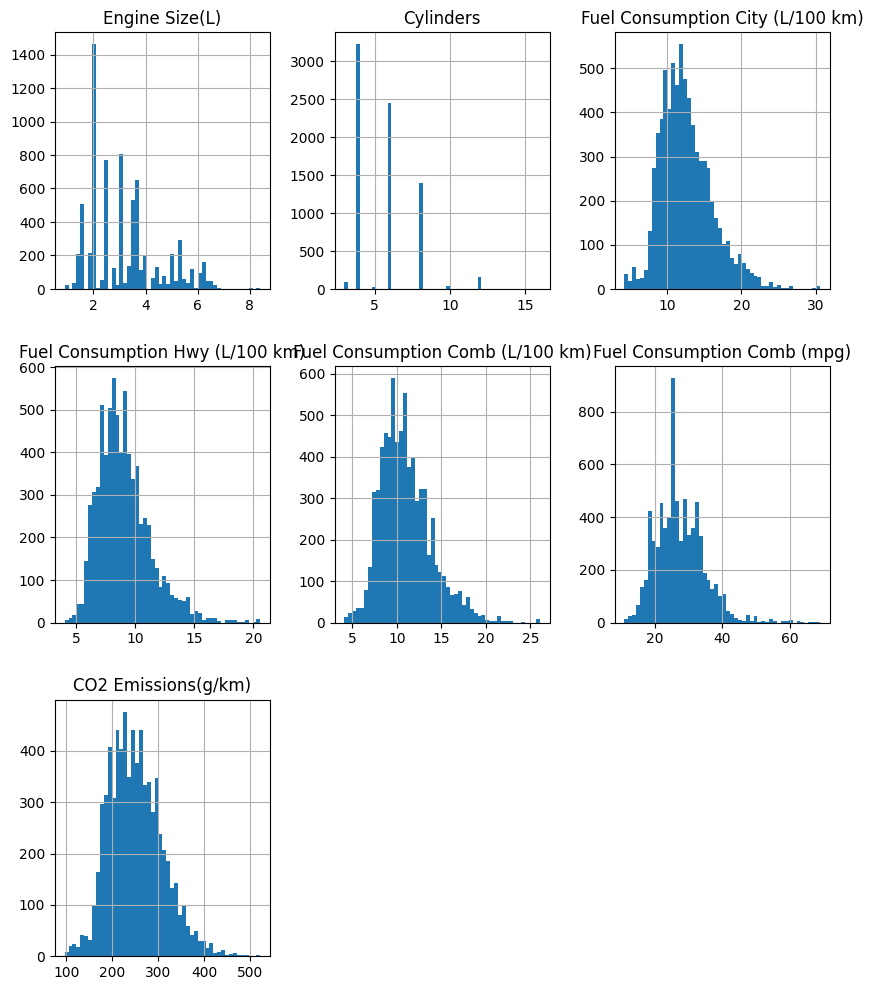

In [15]:
df.hist(bins=50, figsize=(10,12))

<Axes: >

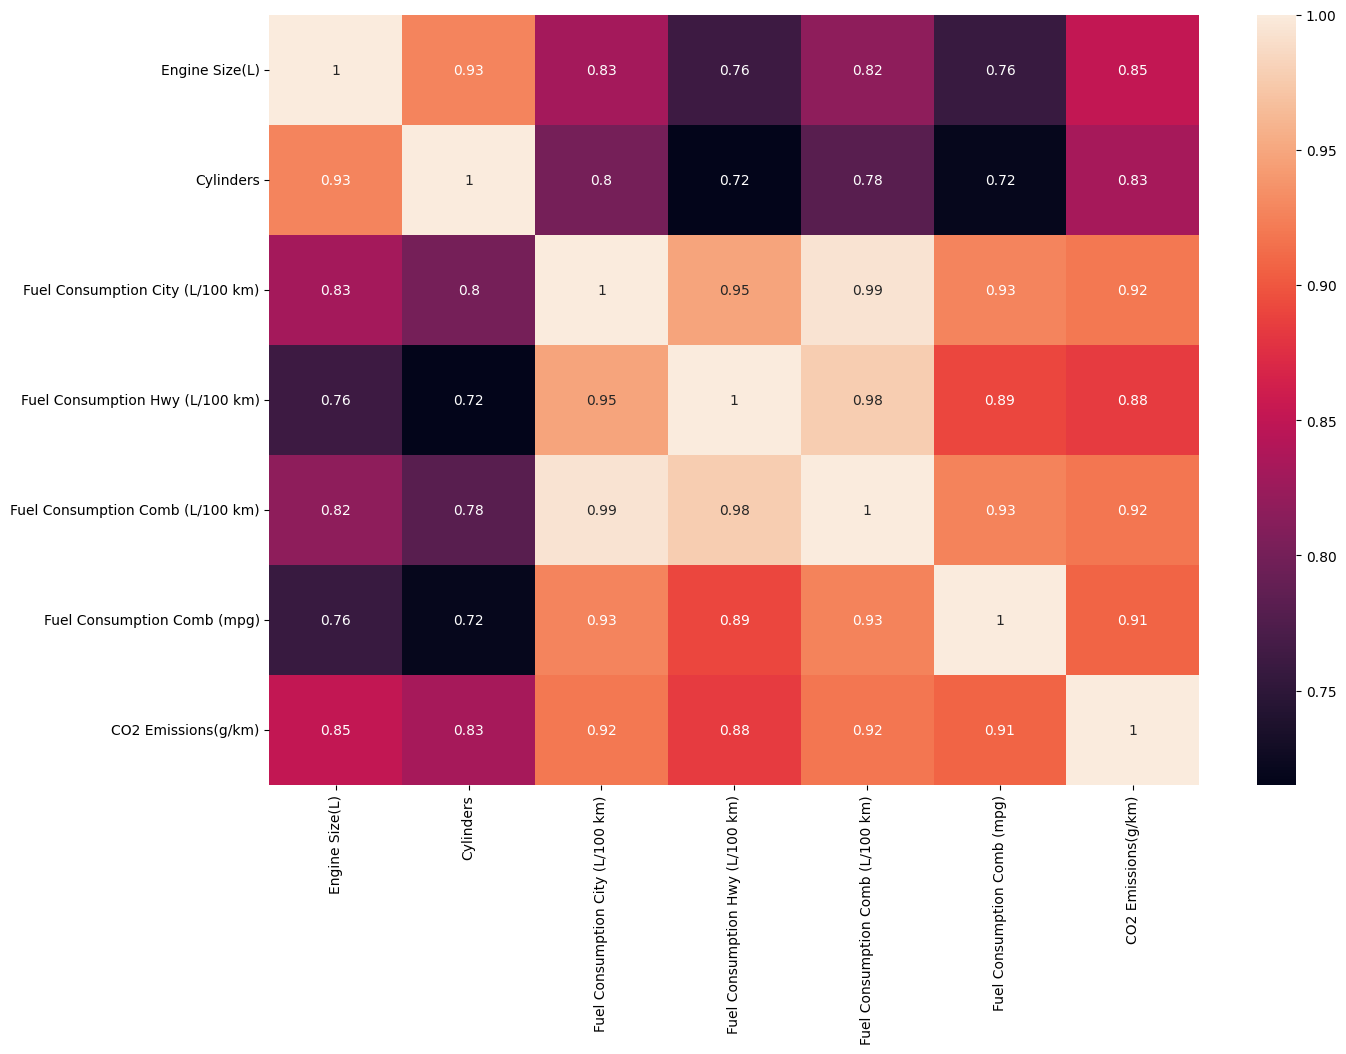

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_col].corr().abs(), annot=True)

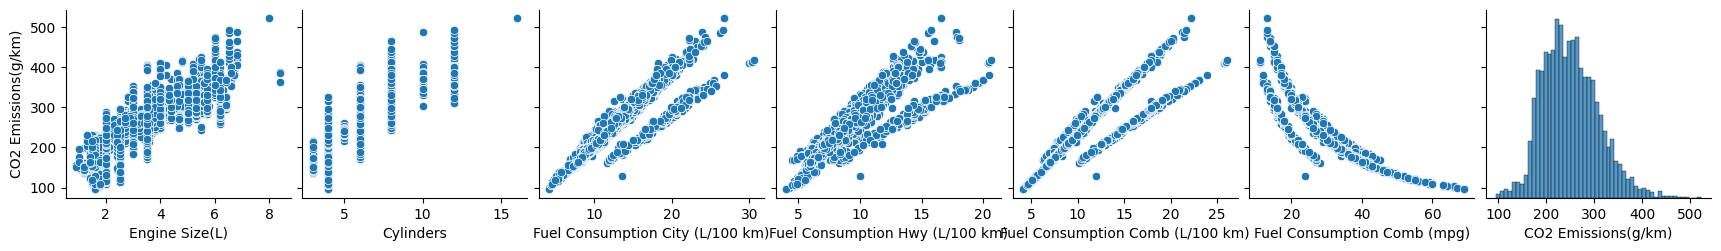

In [18]:
sns.pairplot(data=df, y_vars=['CO2 Emissions(g/km)'])

# Aplicando transformacion a variables categoricas

In [19]:
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()
le = LabelEncoder()
for col in cat_col:
    df1[col] = le.fit_transform(df1[col])

In [20]:
df1.describe()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,19.570210,1023.658768,6.364523,3.160068,5.615030,14.027759,3.262153,12.556534,9.041706,10.975071,27.481652,250.584699
std,11.311625,577.022369,4.822959,1.354170,1.828307,7.260507,0.882482,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.000000,0.000000,0.000000,0.900000,3.000000,0.000000,0.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,9.000000,531.000000,2.000000,2.000000,4.000000,6.000000,3.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,18.000000,999.000000,6.000000,3.000000,6.000000,15.000000,3.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,29.000000,1524.000000,11.000000,3.700000,6.000000,17.000000,4.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,41.000000,2052.000000,15.000000,8.400000,16.000000,26.000000,4.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<Axes: >

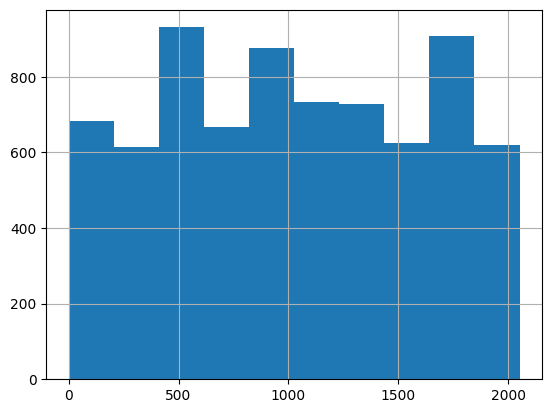

In [21]:
df1['Model'].hist()

# Variables y predictor

In [23]:
X = df1.drop(['CO2 Emissions(g/km)'], axis=1)
y = df1['CO2 Emissions(g/km)']

# Division de los datos

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr = lr.fit(X_train, y_train)

In [26]:
lr.score(X_train, y_train)

0.9163094675984438

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    #MSE
    mse = mean_squared_error(y_true,y_pred)
    print("MSE: ",mse)

    #RMSE
    rmse = np.sqrt(mse)
    print("RMSE: ",rmse)

    #MAE
    mae = mean_absolute_error(y_true, y_pred)
    print("MAE: ",mae)

    # MAPE
    mape = mean_absolute_percentage_error(y_true,y_pred)
    print("MAPE: ",mape)

    #R2
    r2 = r2_score(y_true, y_pred)
    print("R2: ",r2)


In [28]:
y_pred = lr.predict(X_test)

In [30]:
calcular_metricas(y_test,y_pred)

MSE:  282.2927448512894
RMSE:  16.80156971390737
MAE:  10.875631476464639
MAPE:  0.043105193337489925
R2:  0.914080024670861


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)

In [32]:
y_pred_dt = dt.predict(X_test)
calcular_metricas(y_test,y_pred_dt)

MSE:  12.062041298201287
RMSE:  3.473044960578726
MAE:  1.7800487276664863
MAPE:  0.007385847385319483
R2:  0.996328739191273


In [33]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'MLP': MLPRegressor()

}

In [34]:
from sklearn.model_selection import cross_val_score

def val_models(models, X, y):
    results={}
    for model_name, model in models.items():
        scores = cross_val_score(model,X, y, cv=5)
        results[model_name] = scores
    
    return results

In [35]:
results = val_models(models, X_train, y_train)

In [36]:
results

{'LR': array([0.92115261, 0.91888636, 0.91381093, 0.9149572 , 0.90934483]),
 'SVM': array([0.02778026, 0.00289129, 0.00106326, 0.0133661 , 0.02387334]),
 'DT': array([0.99223604, 0.99550759, 0.9959742 , 0.99572564, 0.99295196]),
 'RF': array([0.99763141, 0.9977456 , 0.99755512, 0.99784547, 0.9963666 ]),
 'MLP': array([0.90961052, 0.9097662 , 0.90512261, 0.90350516, 0.9001127 ])}

Mean LR: 0.9156303881112328
std LR: 0.004107754282987828

Mean SVM: 0.013794846999372567
std SVM: 0.010754835440623434

Mean DT: 0.9944790835531906
std DT: 0.0015627187540419544

Mean RF: 0.9974288378585531
std RF: 0.0005402329840583985

Mean MLP: 0.9056234399861885
std MLP: 0.0036923019305071776



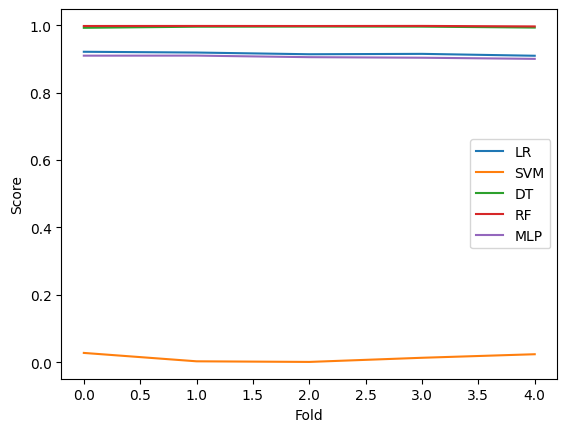

In [38]:
for model_name, scores in results.items():
    plt.plot(scores, label=model_name)
    print(f"Mean {model_name}: {np.mean(scores)}")
    print(f'std {model_name}: {np.std(scores)}')
    print('')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.show()